<a href="https://colab.research.google.com/github/tristandewildt/ValueMonitor/blob/5570999/Applying_Anchored_Corex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install corextopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [ ]:
# Get 20 newsgroups data
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [ ]:
type(newsgroups)

sklearn.utils.Bunch

In [ ]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(newsgroups.data)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(11314, 20000)

In [ ]:
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [ ]:
# To leave out words which are integers
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape

(11314, 19038)

In [ ]:
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [ ]:
words_for_10th_topic = topic_model.get_topics(topic=10, n_words=10)
words_for_10th_topic

[('drive', 0.047627990817893005, 1.0),
 ('sale', 0.03659626266401961, 1.0),
 ('scsi', 0.03449211850942685, 1.0),
 ('controller', 0.034160334506778064, 1.0),
 ('board', 0.0250823970923262, 1.0),
 ('shipping', 0.023611161543043848, 1.0),
 ('ide', 0.02328270220749617, 1.0),
 ('drives', 0.0230260827505694, 1.0),
 ('cd', 0.022273944472671618, 1.0),
 ('bus', 0.021876237674240656, 1.0)]

In [ ]:
words_for_10th_topic[1]

('sale', 0.03659626266401961, 1.0)

In [ ]:
import pandas as pd

new_tuples = []
for i in range(0,49):
  words_for_ith_topic = topic_model.get_topics(topic=i, n_words=10)
  # print(words_for_ith_topic)
  a = i
  for j in range(0,5):
    new_tuple = (a, *words_for_ith_topic[j])
    # print(new_tuple)
    new_tuples.append(new_tuple)

df = pd.DataFrame(new_tuples,columns=['topic', 'word', 'tc_topic', 'word_present'])

In [ ]:
df.head()

,topic,word,tc_topic,word_present
0,0,dsl,0.042432,1.0
1,0,n3jxp,0.041757,1.0
2,0,chastity,0.041757,1.0
3,0,cadre,0.041258,1.0
4,0,geb,0.040431,1.0


In [ ]:
# anchor_words = [[], ['team', 'game', 'season', 'players', 'league'], ['government', 'law', 'public', 'rights', 'state']]
# anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
# anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6)

## Automating anchor word selection
Just taking the top 5 words of topic_model.get_topic() results from each topic

In [ ]:
anchor_words = []
for i in range(0,49):
  anchor_words_per_topic = df.word[df.topic == i].values.tolist()
  anchor_words.append(anchor_words_per_topic)
anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6)

In [ ]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: dsl, n3jxp, chastity, cadre, geb, shameful, intellect, skepticism, banks, pitt
1: team, game, season, players, league, play, hockey, games, teams, nhl
2: government, law, public, rights, state, encryption, clipper, federal, security, secure
3: god, jesus, bible, christians, christian, christ, religion, jews, church, faith
4: people, say, fact, point, believe, person, saying, world, reason, mean
5: armenians, armenian, national, international, argic, press, policy, serdar, soviet, armenia
6: file, program, window, directory, ftp, pub, server, application, unix, available
7: based, issue, sense, clear, truth, subject, certain, known, particular, existence
8: cs, ma, au, gmt, cc, uu, id, sites, fi, host
9: windows, software, card, thanks, pc, dos, files, disk, advance, ram
10: drive, sale, scsi, controller, board, shipping, ide, drives, cd, bus
11: pitching, hit, staff, braves, runs, hitter, nl, smith, hr, baltimore
12: just, don, like, time, going, right, better, let, come, didn
13: a

In [ ]:
print(topic_model.clusters[0])

8


In [ ]:
topic_model.tc

44.547808454659226

In [ ]:
anchored_topic_model.tc

118.42168956109052

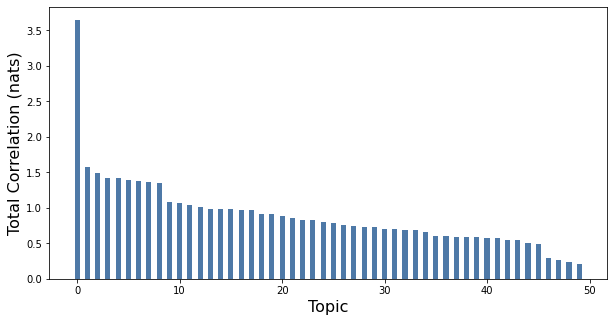

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)

Text(0, 0.5, 'Total Correlation (nats)')

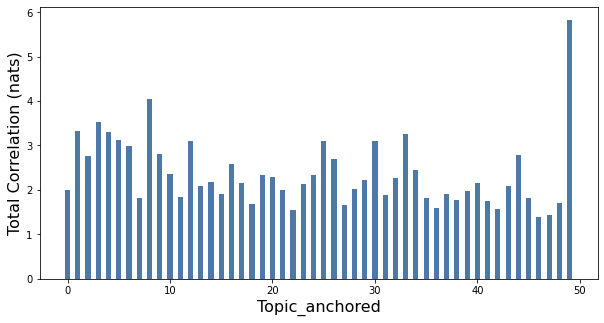

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(anchored_topic_model.tcs.shape[0]), anchored_topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic_anchored', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)

In [ ]:
topic_model.get_topics(n_words=10, topic=16)

[('war', 0.04756623051043258, 1.0),
 ('country', 0.03911737022274669, 1.0),
 ('children', 0.038849130595586166, 1.0),
 ('killed', 0.03858093933773956, 1.0),
 ('military', 0.03414907965477289, 1.0),
 ('population', 0.03099598737683641, 1.0),
 ('society', 0.025357856826708686, 1.0),
 ('live', 0.024933026341840282, 1.0),
 ('soldiers', 0.022891116429347224, 1.0),
 ('anti', 0.022530714602238565, 1.0)]

In [ ]:
anchored_topic_model.get_topics(n_words=10, topic=16)

[('country', 0.5309571839038109, 1.0),
 ('children', 0.5229014782474128, 1.0),
 ('war', 0.4510335002440822, 1.0),
 ('killed', 0.37831813236762957, 1.0),
 ('military', 0.36468778686461933, 1.0),
 ('israel', 0.035734940063241676, 1.0),
 ('jews', 0.03236520259443795, 1.0),
 ('israeli', 0.02907219736046021, 1.0),
 ('arab', 0.022541775753925783, 1.0),
 ('peace', 0.02049150755901015, 1.0)]

## Word embedding for Value Monitor 
Trying gensim word2vec library for word embedding for a kaggle dataset

In [ ]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls

sample_data  scopus_1.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [ ]:
# df1 = df[['Abstract', 'Author Keywords']]
# df1.head()
# df1.info
df['Maker_Model']= df['Make']+ " " + df['Model']
df['Maker_Model'].head()

0    BMW 1 Series M
1      BMW 1 Series
2      BMW 1 Series
3      BMW 1 Series
4      BMW 1 Series
Name: Maker_Model, dtype: object

In [ ]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]

In [ ]:
df2 = df1.apply(lambda x: '|'.join(x.astype(str)), axis=1)
df2.head()

0    premium unleaded (required)|MANUAL|rear wheel ...
1    premium unleaded (required)|MANUAL|rear wheel ...
2    premium unleaded (required)|MANUAL|rear wheel ...
3    premium unleaded (required)|MANUAL|rear wheel ...
4    premium unleaded (required)|MANUAL|rear wheel ...
dtype: object

In [ ]:
df_clean = pd.DataFrame({'clean': df2})

In [ ]:
sent = [row.split('|') for row in df_clean['clean']]

In [ ]:
sent[0]

['premium unleaded (required)',
 'MANUAL',
 'rear wheel drive',
 'Factory Tuner,Luxury,High-Performance',
 'Compact',
 'Coupe',
 'BMW 1 Series M']

In [ ]:
from gensim import models

In [ ]:
len(sent)

1142

In [ ]:

print("Model training started")
model = models.Word2Vec(sentences=sent)

Model training started


In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")

In [ ]:
vector = model.wv['computer']

In [ ]:
sims = model.wv.most_similar('computer', topn=10)
sims

[('system', 0.21617142856121063),
 ('survey', 0.044689204543828964),
 ('interface', 0.015203374437987804),
 ('time', 0.0019510634010657668),
 ('trees', -0.03284314647316933),
 ('human', -0.0742427185177803),
 ('response', -0.09317589551210403),
 ('graph', -0.09575346112251282),
 ('eps', -0.10513807088136673),
 ('user', -0.16911624372005463)]